In [1]:
import math as m
import numpy as np
import matplotlib.pyplot as plt
import vice
from _globals import ONEZONE_DEFAULTS
from multizone.src.models import insideout
from multizone.src.yields import J21

In [2]:
name = '../data/onezone/enriched_infall/test'
sfr = insideout(8)
simtime = np.arange(0, 13.21, 0.01)
sz = vice.singlezone(name=name,
                     func=sfr,
                     mode='sfr',
                     **ONEZONE_DEFAULTS)
sz.run(simtime, overwrite=True)

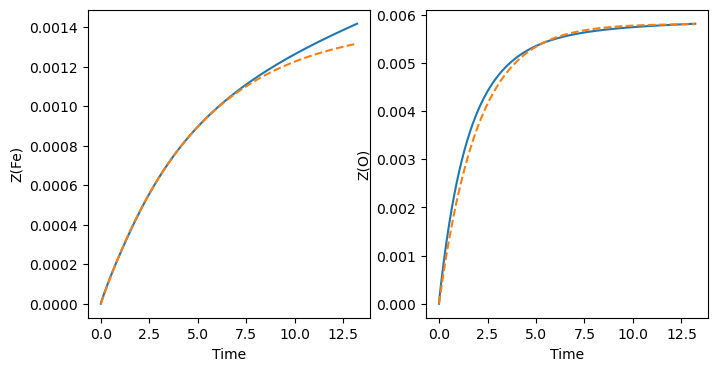

In [4]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
hist = vice.history(name)
axs[0].plot(hist['time'], hist['z(fe)'])
axs[0].plot(hist['time'], [hist['z(fe)'][-1] * (1 - m.exp(-t/5)) for t in hist['time']], linestyle='--')
axs[1].plot(hist['time'], hist['z(o)'])
axs[1].plot(hist['time'], [hist['z(o)'][-1] * (1 - m.exp(-t/2)) for t in hist['time']], linestyle='--')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Z(Fe)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Z(O)')
plt.show()

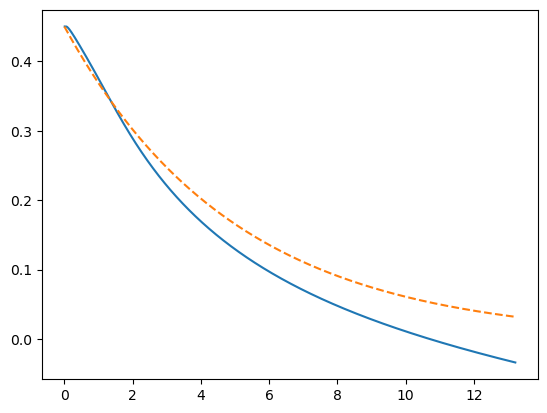

In [16]:
plt.plot(hist['time'], hist['[o/fe]'])
plt.plot(hist['time'], [0.45 * m.exp(-t/5)  for t in hist['time']], linestyle='--')
plt.show()

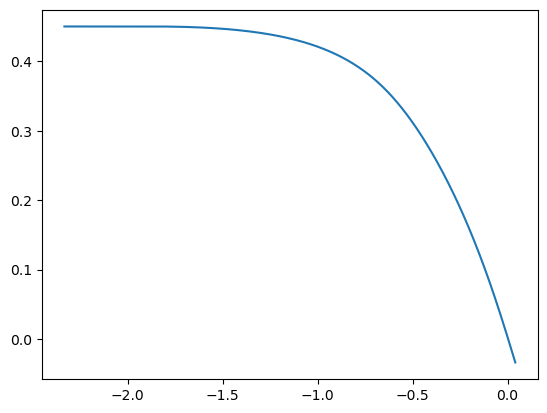

In [8]:
plt.plot(hist['[fe/h]'], hist['[o/fe]'])